In [1]:
import numpy as np
import pandas as pd


In [2]:
autos_raw = pd.read_csv("autos.csv",encoding = "ISO-8859-1")

In [160]:
autos = autos_raw[:500][['price', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer','fuelType', 'brand', 'vehicleType']]
#powerPS == metric HP

autos['price']/=100
#price in thousand euros

autos = autos.dropna(how='any')

autos = autos.drop(autos[autos.price < 1].index)
autos = autos.drop(autos[autos.price > 1000].index)

autos = autos.drop(autos[autos.powerPS == 0].index)
autos = autos.drop(autos[autos.powerPS > 1000].index)

autos = autos.drop(autos[autos.yearOfRegistration <1990].index)

n = autos.shape[0]
print(n)

362


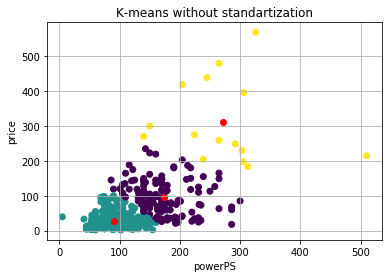

[ 178.82644193  145.63903888]
[[ 173.03100775   96.74403101]
 [  90.98165138   27.68775229]
 [ 272.46666667  312.48533333]]


In [161]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = 'powerPS'
y = 'price'
data = autos[[x, y]]

k = 3


k_means = KMeans(n_clusters=k).fit(data)
k_means_centers = k_means.cluster_centers_

labels = k_means.labels_


plt.title("K-means without standartization")
plt.grid()
plt.scatter(data[x], data[y], c = labels)
plt.xlabel(x)
plt.ylabel(y)
plt.scatter(k_means_centers[:,0], k_means_centers[:,1], c='r')
plt.show()

grand_mean = np.mean(k_means_centers, axis = 0)
print(grand_mean)
print(k_means_centers)



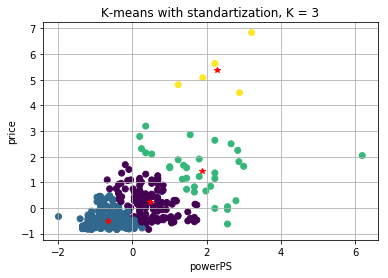

grand mean         : 0.992223741439 1.63173361941
1st cluster center : 0.478600231564 0.218708390428
2nd cluster center : -0.661450072493 -0.508884357384
3rd cluster center : 1.86374506254 1.44898138717
4th cluster center : 2.28799974414 5.36812905744
[[ 0.47860023  0.21870839]
 [-0.66145007 -0.50888436]
 [ 1.86374506  1.44898139]
 [ 2.28799974  5.36812906]]


In [190]:
#Standartization of dataset
def compute_mean_std(data):
    mean = np.mean(data)
    x_i_sq = data*data
    std = (np.mean(x_i_sq) - mean**2)**(1/2)
    return mean, std

x = 'powerPS'
y = 'price'
mean_x, std_x = compute_mean_std(data[x])
mean_y, std_y = compute_mean_std(data[y])

new_data = np.copy(data)

new_data[:,0] = (data[x]-mean_x)/std_x
new_data[:,1] = (data[y]-mean_y)/std_y

from sklearn.cluster import KMeans
k = 4

k_means = KMeans(n_clusters=k).fit(new_data)
k_means_centers = k_means.cluster_centers_

labels = k_means.labels_


plt.title("K-means with standartization, K = 3")
plt.grid()
plt.scatter(new_data[:,0], new_data[:,1], c = labels)
plt.xlabel(x)
plt.ylabel(y)
plt.plot(k_means_centers[:,0], k_means_centers[:,1], 'r*')
plt.show()




grand_mean = np.mean(k_means_centers, axis = 0)
print("grand mean         :", grand_mean[0], grand_mean[1])
print("1st cluster center :", k_means_centers[0][0], k_means_centers[0][1])
print("2nd cluster center :", k_means_centers[1][0], k_means_centers[1][1])
print("3rd cluster center :", k_means_centers[2][0], k_means_centers[2][1])
print("4th cluster center :", k_means_centers[3][0], k_means_centers[3][1])

print(k_means_centers)

Cluster mean = -0.661450072493
Cluster std  = 0.391232599369


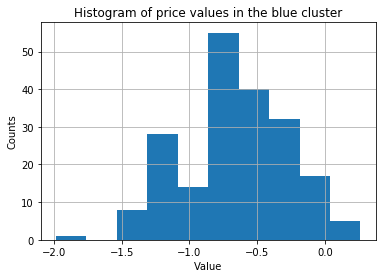

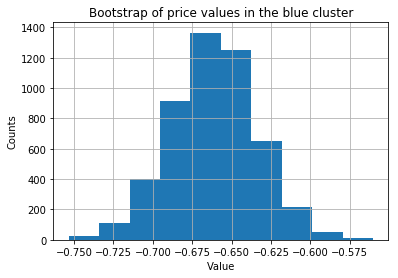

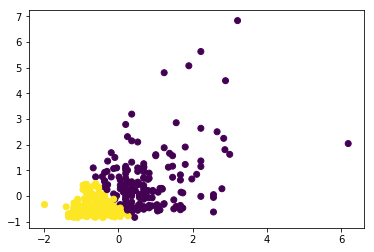

In [191]:
def bootstrap(data, m = 5000):
    n = data.shape[0]
    r = np.random.randint(0,n,(n,m))
    xr = data[r]
    mr = np.mean(xr, axis = 0)
    return mr

mr = bootstrap(np.array(new_data[:,0][labels==1]))
mean_x, std_x = compute_mean_std(new_data[:,0][labels==1])
print("Cluster mean =",mean_x)
print("Cluster std  =",std_x)

plt.title("Histogram of price values in the blue cluster")
plt.xlabel('Value')
plt.grid()
plt.ylabel('Counts')
plt.hist(new_data[:,0][labels==1])
plt.show()


plt.title("Bootstrap of price values in the blue cluster")
plt.xlabel('Value')
plt.grid()
plt.ylabel('Counts')
plt.hist(mr)
plt.show()


plt.scatter(new_data[:,0], new_data[:,1], c = (labels==1))
plt.show()

Cluster mean = 1.86374506254
Cluster std  = 1.10295258902


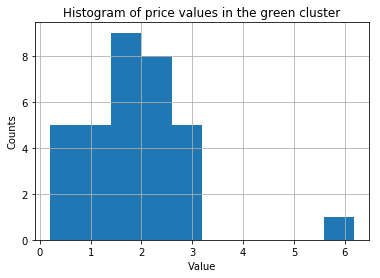

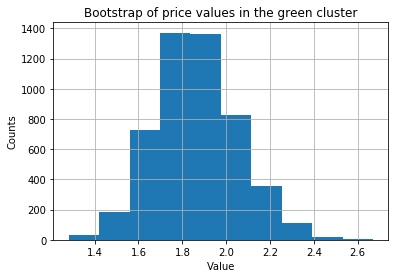

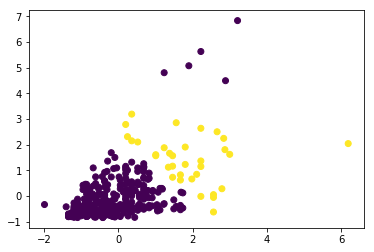

In [192]:
mr = bootstrap(np.array(new_data[:,0][labels==2]))
mean_x, std_x = compute_mean_std(new_data[:,0][labels==2])
print("Cluster mean =",mean_x)
print("Cluster std  =",std_x)

plt.title("Histogram of price values in the green cluster")
plt.xlabel('Value')
plt.grid()
plt.ylabel('Counts')
plt.hist(new_data[:,0][labels==2])
plt.show()


plt.title("Bootstrap of price values in the green cluster")
plt.xlabel('Value')
plt.grid()
plt.ylabel('Counts')
plt.hist(mr)
plt.show()


plt.scatter(new_data[:,0], new_data[:,1], c = (labels==2))
plt.show()

In [179]:
#assignment 4

In [180]:
#assignment 6

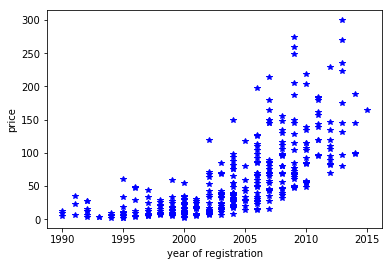

det : 0.492486951524
slope : 7.25854188734
correlation coefficient : [[ 1.          0.70177415]
 [ 0.70177415  1.        ]]
При уменьшении возраста машины на 1 год, цена увеличивается на 7 евро
intercept : -14484.890162


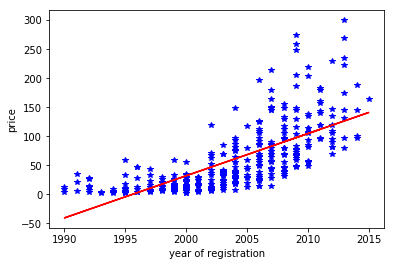

n      error
1     -38.777282
34     74.936515
50    -39.012197
75     14.764945
100    46.676887
195    54.581355
239   -43.223572
dtype: float64
40.6991818543


In [193]:
x = autos['yearOfRegistration'][autos['price']<=300]
y = autos['price'][autos['price']<=300]
#x = 2016 - x
plt.xlabel("year of registration")
plt.ylabel("price")
plt.plot(x, y, "*b")
plt.show()

x = autos['yearOfRegistration'][autos['price']<=300]
y = autos['price'][autos['price']<=300]
c = np.corrcoef(x,y)
rho = c[0,1]
det = rho**2
print("det :", det) #hight enough if its value is about 0.5

slope = rho*np.std(y)/np.std(x)
print("slope :",slope)

print("correlation coefficient :", c)

print("При уменьшении возраста машины на 1 год, цена увеличивается на 7 евро")
intercept = np.mean(y)-slope*np.mean(x)  #y = slope*x + instercept

print("intercept :", intercept) #better not to tell anything about intercept
yc = slope*x + intercept

plt.xlabel("year of registration")
plt.ylabel("price")
plt.plot(x, y, "*b", x, yc, "-r")
plt.show()


indexes = np.array([1,34,50,75,100,195,239])
xf = x[indexes]
yf = y[indexes]
ycf = yc[indexes]

error = 100*(ycf-yf)/yf
print("n      error")
print(error)
error = 100*(yc-y)/y
print(np.mean(error))

In [194]:
a = np.random.randint(0,4,(2,3))
b = np.array([3,2,1,0])
print(a)
print(b[a])


[[3 1 0]
 [2 3 3]]
[[0 2 3]
 [1 0 0]]
